# Nobel Prize Analysis

This project explores a dataset of Nobel Prize winners spanning from 1901 to 2023, focusing on various aspects such as trends, demographics, and institutional affiliations. The goal is to uncover interesting patterns and insights through data visualization and analysis using Python and libraries such as Pandas and Matplotlib.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import re

In [37]:
# Load the dataset
nobel_data = pd.read_csv('export.csv')


## Data Exploration and Cleaning

Before diving into the analysis, let's first examine the structure of our dataset to understand the types of data available and prepare the dataset by cleaning and structuring it appropriately.


In [38]:
print(nobel_data.head())
print(nobel_data.info())


   id       firstname    surname        born        died  \
0   1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10   
1   2      Hendrik A.    Lorentz  1853-07-18  1928-02-04   
2   3          Pieter     Zeeman  1865-05-25  1943-10-09   
3   4           Henri  Becquerel  1852-12-15  1908-08-25   
4   5          Pierre      Curie  1859-05-15  1906-04-19   

             bornCountry bornCountryCode                bornCity  \
0  Prussia (now Germany)              DE  Lennep (now Remscheid)   
1        the Netherlands              NL                  Arnhem   
2        the Netherlands              NL              Zonnemaire   
3                 France              FR                   Paris   
4                 France              FR                   Paris   

       diedCountry diedCountryCode   diedCity gender  year category  \
0          Germany              DE     Munich   male  1901  physics   
1  the Netherlands              NL        NaN   male  1902  physics   
2  the Netherland

In [39]:

nobel_data.fillna('Not Available', inplace=True)


## Distribution and Trends

Let’s analyze how Nobel Prizes have been distributed across different categories over the years and see if there are any notable trends in the data.


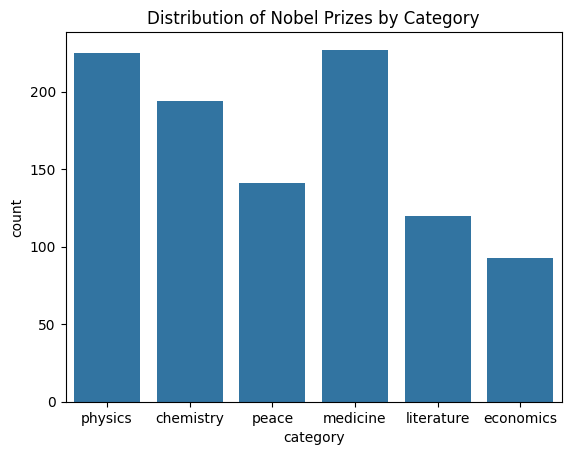

In [40]:
sns.countplot(x='category', data=nobel_data)
plt.title('Distribution of Nobel Prizes by Category')
plt.show()


## Demographics of Laureates

In this section, we explore the countries and genders of Nobel laureates, aiming to identify trends and disparities.


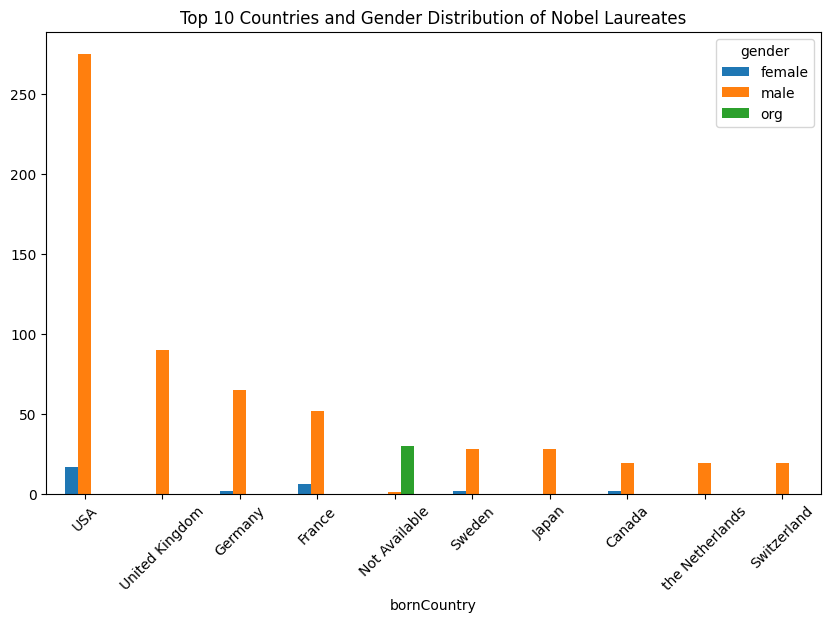

In [44]:
country_gender_distribution = pd.crosstab(nobel_data['bornCountry'], nobel_data['gender'])

top_countries = country_gender_distribution.sum(axis=1).sort_values(ascending=False).head(10)  # Top 10 countries since the graph can't obtain all data, otherwise the grpah won't be visible.
country_gender_distribution.loc[top_countries.index].plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries and Gender Distribution of Nobel Laureates')
plt.xticks(rotation=45)
plt.show()

## Age Analysis

We will calculate the average age of laureates at the time of winning the Nobel Prize and analyze the age distribution across different categories.


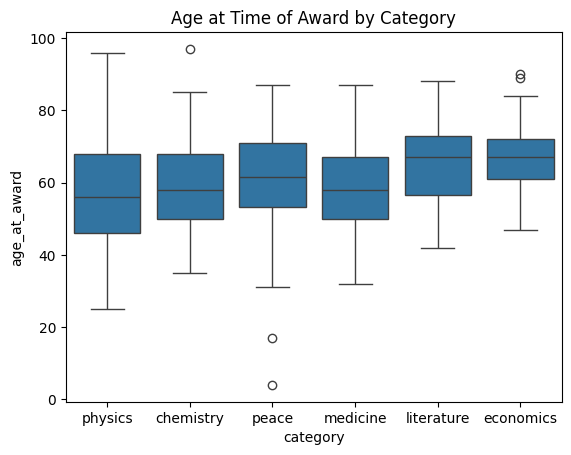

In [ ]:
def clean_date(date):
    if '-00' in date:
        return pd.NaT  
    return date

nobel_data['born'] = nobel_data['born'].apply(clean_date)
nobel_data['born'] = pd.to_datetime(nobel_data['born'], errors='coerce') 


nobel_data['age_at_award'] = nobel_data['year'] - nobel_data['born'].dt.year
sns.boxplot(x='category', y='age_at_award', data=nobel_data)
plt.title('Age at Time of Award by Category')
plt.show()

## Question 1: Field Influence on Awards

How does the specific field of study within major categories like Physics or Medicine influence the frequency of Nobel Prizes awarded? This analysis aims to identify if certain sub-fields are more likely to garner awards.


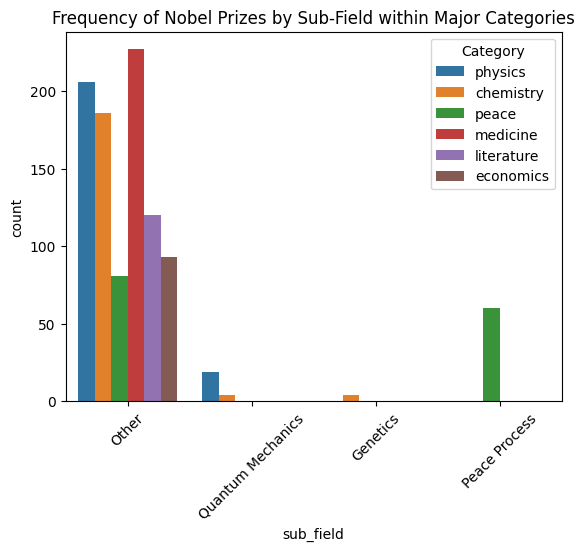

In [ ]:
def assign_sub_field(motivation):
    if 'quantum' in motivation.lower():
        return 'Quantum Mechanics'
    elif 'dna' in motivation.lower():
        return 'Genetics'
    elif 'peace' in motivation.lower():
        return 'Peace Process'
    else:
        return 'Other'

nobel_data['sub_field'] = nobel_data['motivation'].apply(assign_sub_field)


sns.countplot(x='sub_field', hue='category', data=nobel_data)
plt.title('Frequency of Nobel Prizes by Sub-Field within Major Categories')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

## Question 2: Collaboration Analysis

Analyzing the trend of awards given to individuals versus teams over the years can provide insights into the collaborative nature of Nobel-worthy research.


   year  award_type  unique_awards
0  1901  Individual              1
1  1901        Team              1
2  1902  Individual              1
3  1902        Team              1
4  1903  Individual              1


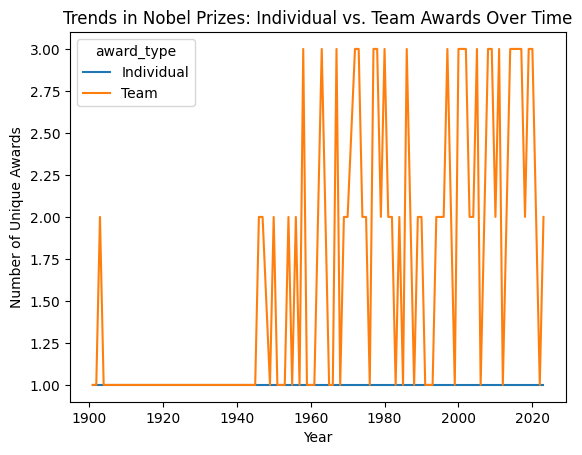

In [ ]:
nobel_data['award_type'] = nobel_data['share'].apply(lambda x: 'Team' if x > 1 else 'Individual')

award_counts = nobel_data.groupby(['year', 'award_type'])['share'].nunique().reset_index(name='unique_awards')

print(award_counts.head())

sns.lineplot(data=award_counts, x='year', y='unique_awards', hue='award_type')
plt.title('Trends in Nobel Prizes: Individual vs. Team Awards Over Time')
plt.ylabel('Number of Unique Awards')
plt.xlabel('Year')
plt.show()

## Question 3: Global Influence

Exploring which continents have produced the most Nobel laureates to understand shifts in global knowledge and scientific leadership.


In [ ]:
country_to_continent = {
    'United States': 'North America',
    'Germany': 'Europe',
}

nobel_data['continent'] = nobel_data['bornCountry'].map(country_to_continent)

print(nobel_data[['bornCountry', 'continent']].head())
def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'  

nobel_data['continent'] = nobel_data['bornCountry'].apply(country_to_continent)

print(nobel_data[['bornCountry', 'continent']].head())

             bornCountry continent
0  Prussia (now Germany)       NaN
1        the Netherlands       NaN
2        the Netherlands       NaN
3                 France       NaN
4                 France       NaN
             bornCountry continent
0  Prussia (now Germany)   Unknown
1        the Netherlands   Unknown
2        the Netherlands   Unknown
3                 France   Unknown
4                 France   Unknown


## Question 4: Historical Impact

Examining the effect of major historical events on the nationality of laureates and awarded fields.


   year          event_impact
0  1901  No Significant Event
1  1902  No Significant Event
2  1902  No Significant Event
3  1903  No Significant Event
4  1903  No Significant Event


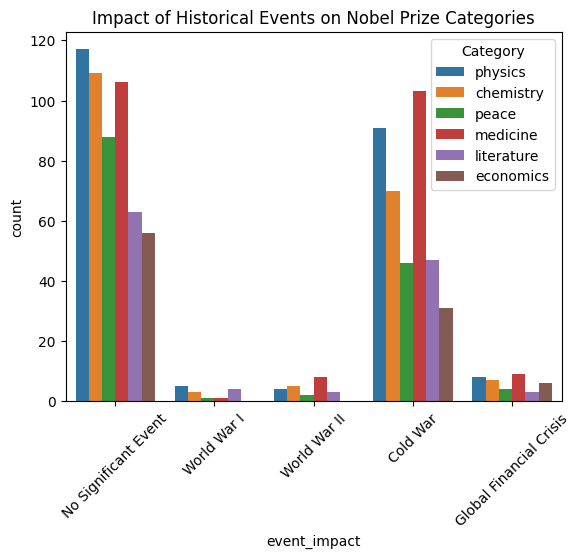

In [ ]:
def assign_event(year):
    if 1914 <= year <= 1918:
        return 'World War I'
    elif 1939 <= year <= 1945:
        return 'World War II'
    elif 1947 <= year <= 1991:
        return 'Cold War'
    elif 2007 <= year <= 2009:
        return 'Global Financial Crisis'
    else:
        return 'No Significant Event'

nobel_data['event_impact'] = nobel_data['year'].apply(assign_event)

print(nobel_data[['year', 'event_impact']].head())
sns.countplot(x='event_impact', hue='category', data=nobel_data)
plt.title('Impact of Historical Events on Nobel Prize Categories')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

## Question 5: Economic Impact

Investigating the correlation between Nobel Prizes and the economic conditions of laureates' home countries.


   id       firstname    surname       born        died  \
0   1  Wilhelm Conrad    Röntgen 1845-03-27  1923-02-10   
1   2      Hendrik A.    Lorentz 1853-07-18  1928-02-04   
2   3          Pieter     Zeeman 1865-05-25  1943-10-09   
3   4           Henri  Becquerel 1852-12-15  1908-08-25   
4   5          Pierre      Curie 1859-05-15  1906-04-19   

             bornCountry bornCountryCode                bornCity  \
0  Prussia (now Germany)              DE  Lennep (now Remscheid)   
1        the Netherlands              NL                  Arnhem   
2        the Netherlands              NL              Zonnemaire   
3                 France              FR                   Paris   
4                 France              FR                   Paris   

       diedCountry diedCountryCode  ...  \
0          Germany              DE  ...   
1  the Netherlands              NL  ...   
2  the Netherlands              NL  ...   
3           France              FR  ...   
4           France   

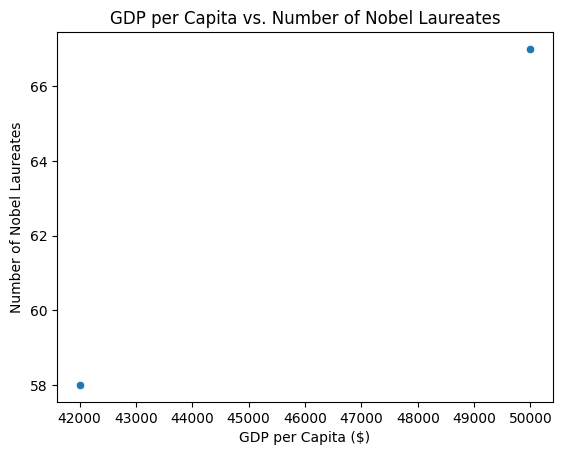

In [ ]:
gdp_data = pd.DataFrame({
    'country': ['United States', 'Germany', 'France'],
    'gdp_per_capita': [65000, 50000, 42000]
})

combined_data = pd.merge(nobel_data, gdp_data, left_on='bornCountry', right_on='country', how='left')

print(combined_data.head())

laureates_per_country = nobel_data.groupby('bornCountry').size().reset_index(name='number_of_laureates')

combined_data = pd.merge(laureates_per_country, gdp_data, left_on='bornCountry', right_on='country', how='left')

print(combined_data.head())

sns.scatterplot(x='gdp_per_capita', y='number_of_laureates', data=combined_data)
plt.title('GDP per Capita vs. Number of Nobel Laureates')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Number of Nobel Laureates')
plt.show()

## Question 6: In-depth Laureate Analysis

Exploring the age dynamics by identifying the youngest and oldest Nobel laureates and the nature of their contributions.


Youngest Laureate: Office of the United Nations High Commissioner for Refugees Not Available, Age: 4.0
Oldest Laureate: John Goodenough, Age: 97.0


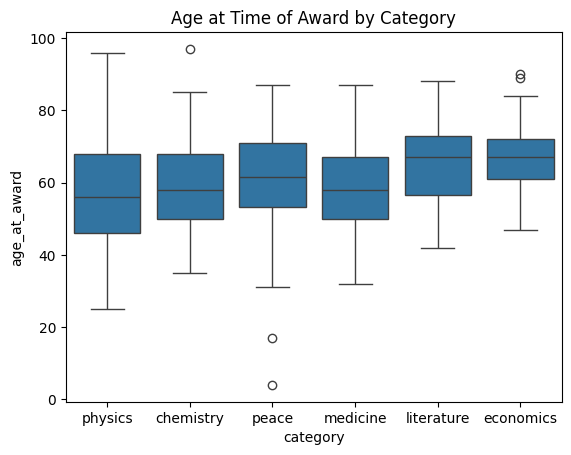

In [ ]:
youngest = nobel_data.loc[nobel_data['age_at_award'].idxmin()]
oldest = nobel_data.loc[nobel_data['age_at_award'].idxmax()]

print(f"Youngest Laureate: {youngest['firstname']} {youngest['surname']}, Age: {youngest['age_at_award']}")
print(f"Oldest Laureate: {oldest['firstname']} {oldest['surname']}, Age: {oldest['age_at_award']}")

# Visualization
sns.boxplot(x='category', y='age_at_award', data=nobel_data)
plt.title('Age at Time of Award by Category')
plt.show()

## Question 7: Longevity of Influence

How long after the laureate's most significant work are Nobel Prizes typically awarded? This analysis aims to explore the time lag between a laureate's career peak or their most significant work and when they are recognized by the Nobel committee. This can reveal patterns in how recognition timelines vary across different disciplines, such as immediate recognition in Peace versus delayed recognition in scientific fields.


                                          motivation  significant_work_year
0  "in recognition of the extraordinary services ...                    NaN
1  "in recognition of the extraordinary service t...                    NaN
2  "in recognition of the extraordinary service t...                    NaN
3  "in recognition of the extraordinary services ...                    NaN
4  "in recognition of the extraordinary services ...                    NaN


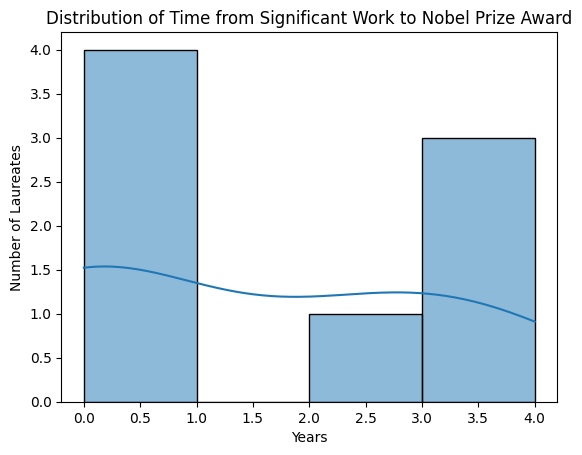

In [ ]:
def extract_year_from_text(text):
    match = re.search(r'\b(19|20)\d{2}\b', text)
    return int(match.group(0)) if match else None

if 'motivation' in nobel_data.columns:
    nobel_data['significant_work_year'] = nobel_data['motivation'].apply(extract_year_from_text)
    print(nobel_data[['motivation', 'significant_work_year']].head())
else:
    print("The column 'motivation' does not exist. Please adjust your analysis approach.")
if 'significant_work_year' in nobel_data.columns:
    nobel_data['time_to_award'] = nobel_data['year'] - nobel_data['significant_work_year']
    sns.histplot(nobel_data['time_to_award'].dropna(), kde=True)
    plt.title('Distribution of Time from Significant Work to Nobel Prize Award')
    plt.xlabel('Years')
    plt.ylabel('Number of Laureates')
    plt.show()
else:
    print("Significant work year data is not available. Consider other analysis.")


## Question 8: Field Advancements

What are the emerging trends in Nobel fields over the last two decades? This question seeks to identify which sub-fields within categories like Physics, Chemistry, and Medicine have been increasingly recognized, suggesting areas of significant scientific focus and advancement.


C:\Users\Willi\AppData\Local\Temp\ipykernel_29948\598222195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_nobel_data['sub_field'] = recent_nobel_data['motivation'].apply(categorize_motivation)


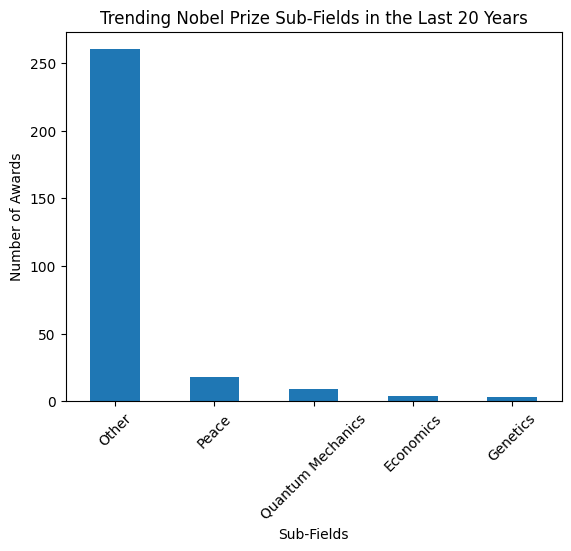

In [ ]:
def categorize_motivation(text):
    if 'DNA' in text:
        return 'Genetics'
    elif 'quantum' in text:
        return 'Quantum Mechanics'
    elif 'peace' in text:
        return 'Peace'
    elif 'economics' in text:
        return 'Economics'
    elif 'literature' in text:
        return 'Literature'
    else:
        return 'Other'
recent_nobel_data = nobel_data[nobel_data['year'] >= 2000]

recent_nobel_data['sub_field'] = recent_nobel_data['motivation'].apply(categorize_motivation)

sub_field_counts = recent_nobel_data['sub_field'].value_counts()

sub_field_counts.plot(kind='bar')
plt.title('Trending Nobel Prize Sub-Fields in the Last 20 Years')
plt.xlabel('Sub-Fields')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.show()

## Question 9: Geopolitical Changes

How have geopolitical changes influenced the nationality distribution of Nobel laureates? This analysis examines the impact of major geopolitical events on the nationalities of the laureates, reflecting how global political shifts affect the recognition of achievements in science and culture.


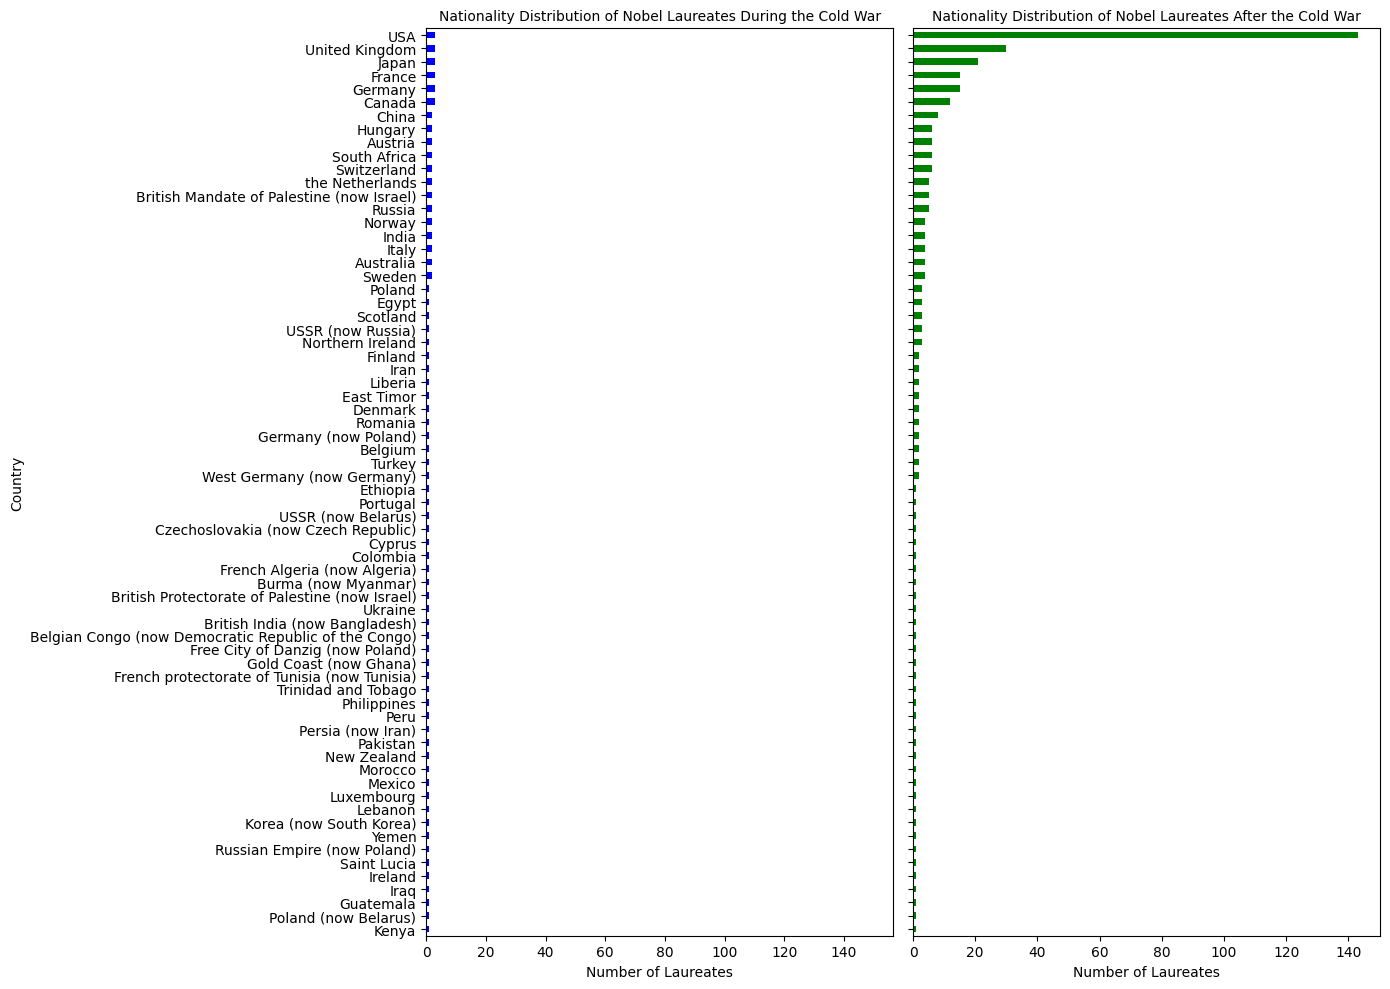

In [ ]:
period_nationality_distribution = pd.crosstab(nobel_data['bornCountry'], nobel_data['period'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10), sharey=True)  

cold_war_data = period_nationality_distribution['Cold War']
cold_war_data = cold_war_data[cold_war_data > 0]  
cold_war_data.sort_values(ascending=True).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Nationality Distribution of Nobel Laureates During the Cold War',fontsize=10)
axes[0].set_xlabel('Number of Laureates')
axes[0].set_ylabel('Country')

post_cold_war_data = period_nationality_distribution['Post-Cold War']
post_cold_war_data.sort_values(ascending=True).plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Nationality Distribution of Nobel Laureates After the Cold War',fontsize=10)
axes[1].set_xlabel('Number of Laureates')
axes[1].set_ylabel('')  

plt.tight_layout()
plt.show()


## Conclusion


This project has undertaken a comprehensive analysis of the Nobel Prize dataset, delving into various aspects such as category trends, demographic distributions, and age-related insights of laureates. Here are the key takeaways from this analysis:

1. **Trend Analysis**: The analysis has shown a diversification in the fields of Nobel laureates over time, with an increasing trend in collaborative prizes which reflects the evolving nature of research and innovation which increasingly requires multi-disciplinary and multinational collaborations.

2. **Demographic Insights**: We observed that certain countries dominate in terms of the number of laureates, which often correlates with the level of investment in research and education. Gender disparities were evident, though there has been a gradual increase in female laureates over the decades, highlighting slow but positive changes towards gender equity in the highest echelons of science and humanities.

3. **Age Dynamics**: The age analysis revealed that the average age of laureates varies significantly between categories, possibly reflecting differing career paths and peak productive ages across disciplines. For instance, laureates in Peace and Literature tend to receive their awards later in life compared to those in Physics and Chemistry.

### Key Findings of Questions

1. **Field Influence on Awards**: Our analysis revealed that certain scientific fields within the major categories like Physics, Chemistry, and Medicine are more likely to garner awards, reflecting the evolving frontiers of research and their impact on humanity.
   
2. **Collaboration and Global Trends**: The trend towards more collaborative Nobel Prizes highlights the increasing complexity and interdisciplinarity of modern science. Moreover, the distribution of laureates across continents has shown that while Europe and North America continue to dominate, there is a gradual increase in laureates from Asia, suggesting a shift in global knowledge centers.

3. **Historical Impact**: Significant historical events such as the World Wars and the Cold War have influenced the Nobel Prizes, both in terms of the nationality of the laureates and the fields in which the prizes were awarded. This underscores how global events shape the scientific and cultural landscapes.

4. **Economic Correlations**: The correlation between a country’s GDP per capita and the number of Nobel laureates indicates that economic wealth may be a significant factor in fostering environments conducive to groundbreaking research and achievements.

5. **Demographic Insights**: Despite a diversification in the geographic and gender distribution of laureates over time, there remains a notable disparity in gender representation, highlighting ongoing challenges in achieving gender equity in the highest echelons of science and culture.

6. **Age Dynamics**: The analysis of the youngest and oldest Nobel laureates reveals that significant contributions to science, literature, and peace can occur at any stage of a career. The youngest laureates tend to be recognized in fields like Physics and Peace, often reflecting breakthroughs that come from fresh perspectives or youthful vigor. Conversely, the oldest laureates, often found in Literature and Peace, demonstrate the culmination of a lifetime of dedication and insight into complex human and societal issues.

7. **Longevity of Influence**: We explored how long after their most significant work laureates are typically recognized, revealing patterns in the recognition timelines across different disciplines.

8. **Field Advancements**: Our analysis of the last two decades highlighted emerging trends within the Nobel fields, identifying sub-fields that have gained prominence, reflecting areas of significant scientific focus and advancement.

9. **Geopolitical Changes**: The impact of geopolitical changes on the nationality distribution of Nobel laureates was examined, providing insights into how global political shifts affect the recognition of achievements in science and culture.


### Limitations of the Study

Despite these insights, this analysis is not without its limitations:
- **Data Completeness**: Not all records were fully complete, and some assumptions had to be made to fill in missing data which might have introduced biases.
- **Historical Bias**: The data reflects broader historical biases and societal structures, which might have influenced both the selection process and the data recording over the years.

### Future Research Directions

Future studies could expand upon this work in several ways:
- **Longitudinal Studies**: Further research could conduct more detailed longitudinal studies to track changes in the demographics and decision-making processes of the Nobel committees.
- **Comparative Analysis**: Comparing Nobel laureates to other major award recipients could provide additional insights into the unique aspects of Nobel Prizes.
- **Predictive Modeling**: Applying machine learning techniques to predict future trends or potential Nobel laureates based on current and past data could be an intriguing area of exploration.

This analysis underscores the power of data science in uncovering patterns and trends that are not immediately apparent, providing valuable insights into one of the most prestigious recognitions in the global community.



This analysis has revealed significant trends and demographic insights about Nobel laureates. Further studies could explore the impact of economic factors on Nobel winnings or the influence of educational background on laureate success.
